In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("car data.xlsx")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
df.shape


(301, 9)

In [3]:
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
df['Selling_Price'].dtype


dtype('float64')

In [5]:
df['Selling_Price'].nunique()


156

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
(df.isnull().sum() / len(df)) * 100


Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [10]:
df.duplicated().sum()


np.int64(2)

In [11]:
df = df.drop_duplicates()


In [12]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns


In [17]:
df = df.copy()


In [18]:
# Force safe copy
df = df.copy()

# Identify columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Numerical → Median
for col in num_cols:
    df.loc[:, col] = df[col].fillna(df[col].median())

# Categorical → Mode
for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])


In [19]:
df.isnull().sum().sum()


np.int64(0)

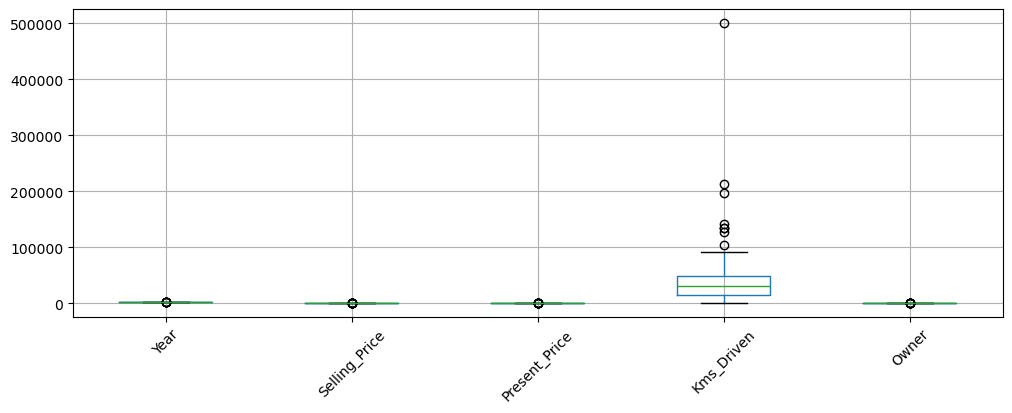

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.show()


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


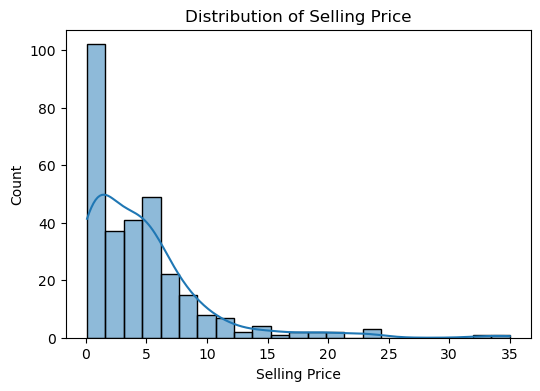

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()


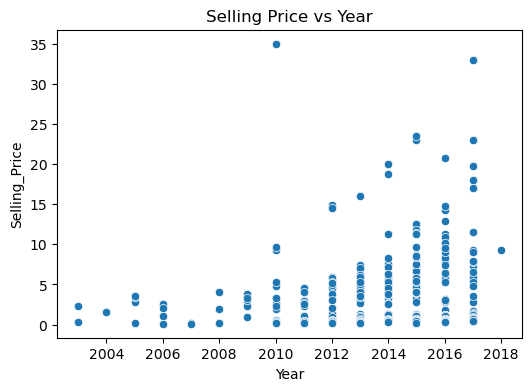

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.title("Selling Price vs Year")
plt.show()


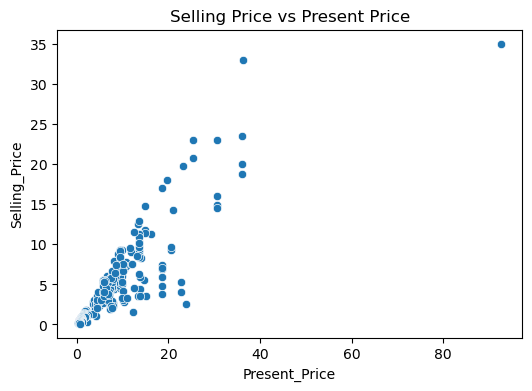

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title("Selling Price vs Present Price")
plt.show()


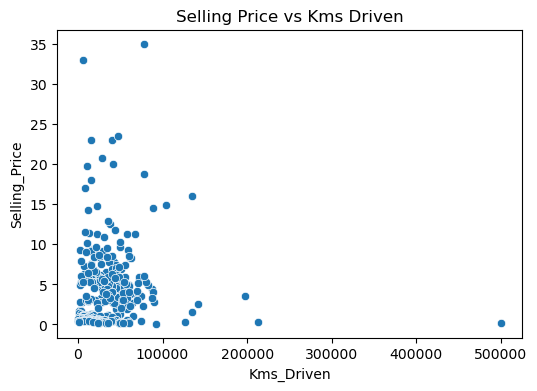

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title("Selling Price vs Kms Driven")
plt.show()


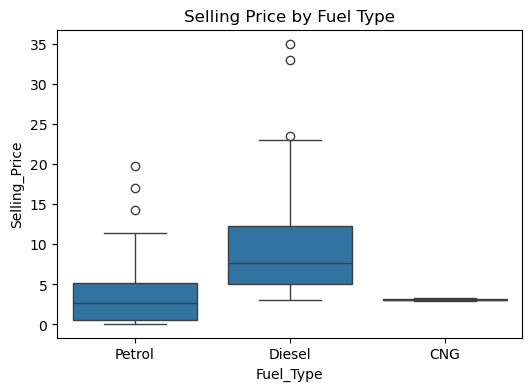

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price by Fuel Type")
plt.show()


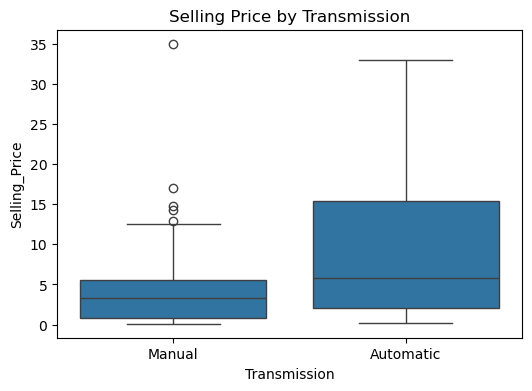

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Selling Price by Transmission")
plt.show()


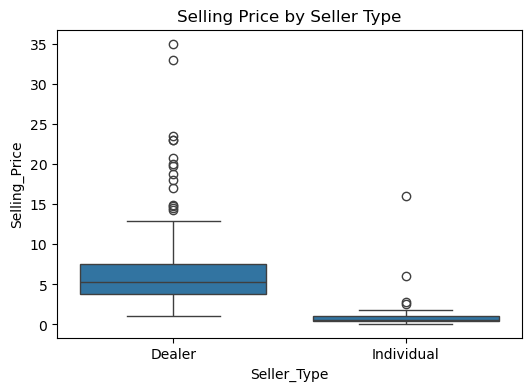

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title("Selling Price by Seller Type")
plt.show()


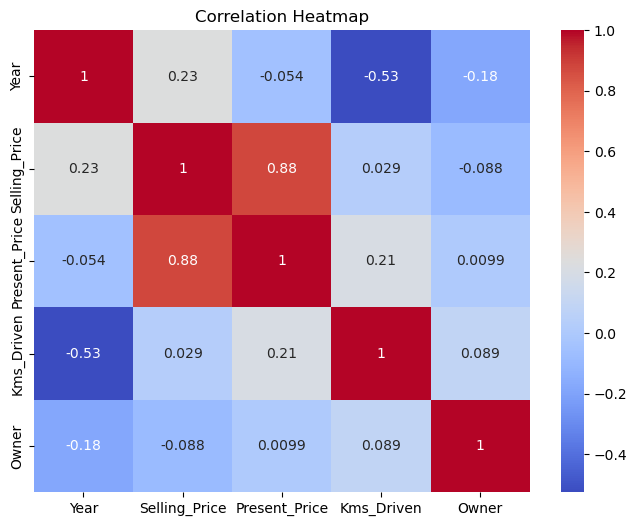

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [31]:
df = df.drop(columns=['Car_Name'])


In [32]:
df['Car_Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [33]:
df['Kms_Driven_log'] = np.log1p(df['Kms_Driven'])
df.drop('Kms_Driven', axis=1, inplace=True)


In [34]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols


Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [35]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [36]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [40]:
def regression_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse


In [41]:
results = []


In [42]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

results.append([
    "Linear Regression",
    *regression_metrics(y_test, y_pred_lr)
])


In [43]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

results.append([
    "Ridge Regression",
    *regression_metrics(y_test, y_pred_ridge)
])


In [44]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

results.append([
    "Lasso Regression",
    *regression_metrics(y_test, y_pred_lasso)
])


In [45]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

results.append([
    "Decision Tree",
    *regression_metrics(y_test, y_pred_dt)
])


In [46]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

results.append([
    "Random Forest",
    *regression_metrics(y_test, y_pred_rf)
])


In [47]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)

results.append([
    "SVR",
    *regression_metrics(y_test, y_pred_svr)
])


In [48]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "R2 Score", "MAE", "RMSE"]
)

results_df.sort_values(by="R2 Score", ascending=False)


,Model,R2 Score,MAE,RMSE
2,Lasso Regression,0.747196,1.479575,2.552566
1,Ridge Regression,0.746645,1.473216,2.555345
0,Linear Regression,0.746322,1.471130,2.556973
3,Decision Tree,0.670076,1.336167,2.916026
5,SVR,0.579953,1.259392,3.290288
4,Random Forest,0.544161,1.449337,3.427603


In [49]:
best_model = rf   # assuming Random Forest performed best


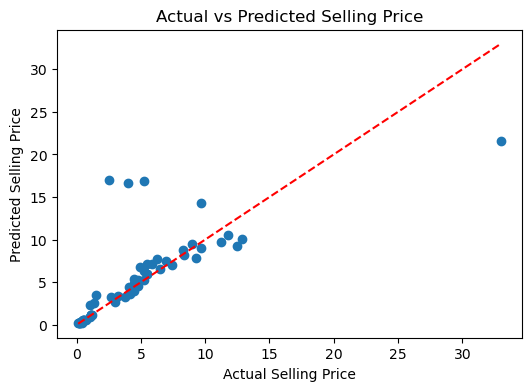

In [50]:
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()


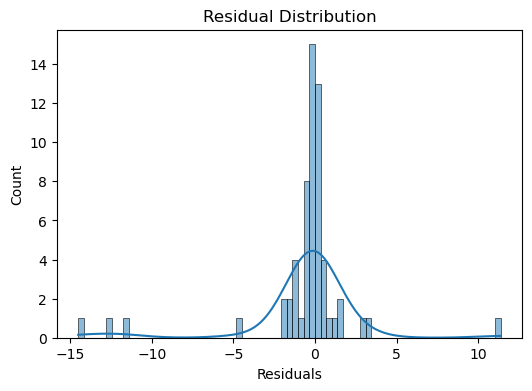

In [51]:
residuals = y_test - y_pred_best

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


In [52]:
final_r2, final_mae, final_rmse = regression_metrics(y_test, y_pred_best)

final_metrics = pd.DataFrame({
    "Metric": ["R2 Score", "MAE", "RMSE"],
    "Value": [final_r2, final_mae, final_rmse]
})

final_metrics


,Metric,Value
0,R2 Score,0.544161
1,MAE,1.449337
2,RMSE,3.427603


In [53]:
results_df.to_csv("model_metrics.csv", index=False)


In [54]:
from sklearn.model_selection import GridSearchCV


In [55]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [56]:
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [58]:
rf_grid.best_params_


{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [59]:
best_rf = rf_grid.best_estimator_


In [60]:
y_pred_tuned = best_rf.predict(X_test)

tuned_r2, tuned_mae, tuned_rmse = regression_metrics(y_test, y_pred_tuned)

tuned_r2, tuned_mae, tuned_rmse


(0.5967923588778132, 1.37092809839466, np.float64(3.2236588319246486))

In [61]:
final_model = best_rf


In [62]:
import joblib

joblib.dump(final_model, "car_price_model.pkl")


['car_price_model.pkl']

In [63]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [64]:
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")


['feature_names.pkl']

In [65]:
loaded_model = joblib.load("car_price_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# test prediction
loaded_model.predict(X_test.iloc[:1])


array([9.66291752])

In [66]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = final_model.predict(X_test)

metrics = {
    "Model": ["Random Forest Regressor"],
    "R2 Score": [r2_score(y_test, y_pred)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred))],
    "MAE": [mean_absolute_error(y_test, y_pred)]
}

metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,R2 Score,RMSE,MAE
0,Random Forest Regressor,0.596792,3.223659,1.370928


In [67]:
metrics_df.to_csv("model_metrics.csv", index=False)


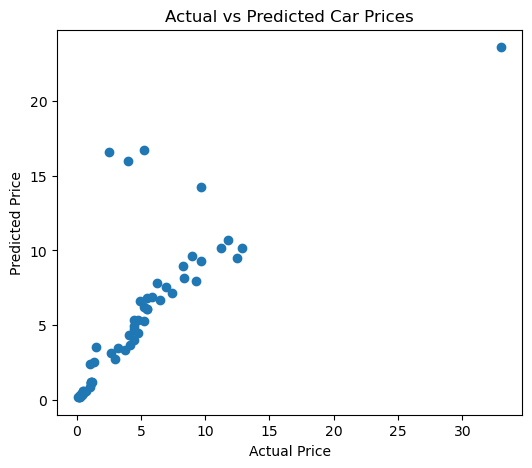

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


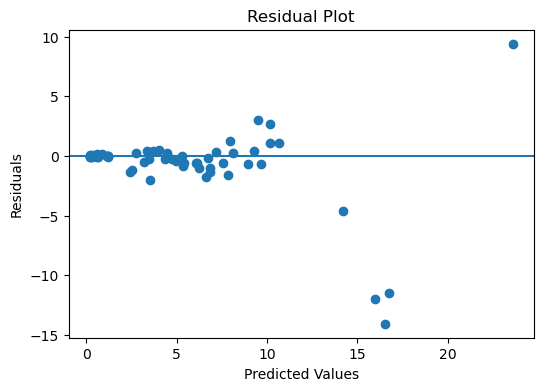

In [69]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


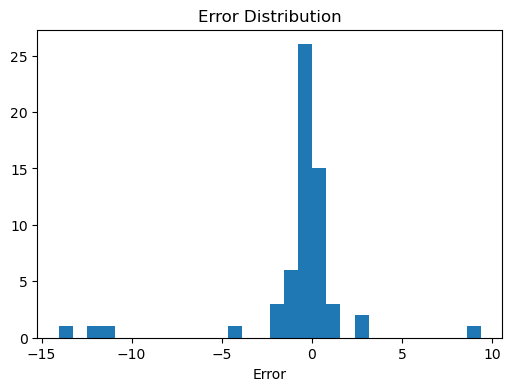

In [70]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Error Distribution")
plt.xlabel("Error")
plt.show()
